# Cut Out UTRs
By Joely Nelson

joelyn@cs.washington.edu

Code to cut out the UTRs out of the sequences of the intergenic sequences

Same as the other file except we are using a different dataset

---
<a id="imports"></a>
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id="help"></a>
### General Helper Functions

In [2]:
def rev_comp(seq):
    '''
    Switches a seqence from top to bottom 
    (ie 'ATGC' becomes 'TACG')
    
    Args:
        seq: a string which represents the top strand of DNA.
        Should only have the characters ATGC
    Ret:
        string sequence that represents the bottom sequence
        (all Ts become As, As become Ts, Gs become Cs, Cs become Gs)
        and is revered
        Resulting string will be all uppercase
    '''
    res = seq.lower()
    res = res.replace('t', 'A')
    res = res.replace('a', 'T')
    res = res.replace('g', 'C')
    res = res.replace('c', 'G')
    res = res[::-1]
    return res

def comp(seq):
    '''
    Returns the compliment of this sequence
    (all Ts become As, As become Ts, Gs become Cs, Cs become Gs)
    Us all uppercase
    '''
    res = seq.lower()
    res = res.replace('t', 'A')
    res = res.replace('a', 'T')
    res = res.replace('g', 'C')
    res = res.replace('c', 'G')
    return res

def rev(seq):
    '''
    reverses a string
    '''
    res = seq[::-1]
    return res


# The following functions are used to apply functions to the dataset
def mod_len(string):
    if type(string) == float:
        return 0
    else:
        return len(string)
    
    
def mod_len_obo(string):
    if type(string) == float:
        return 0
    else:
        return len(string) - 1
    
def strand_trans(string):
    if string == 'forward':
        return '+'
    else:
        return '-'
    
def remove_last_char(string):
    string = str(string)
    return string[0:-1]

In [3]:
remove_last_char("o")

''

<a id="load"></a>
### Loading in Data
We load in our two data sets.

- df_intergenic contains the data we cleaned regarding the intergenic sequences
- df_TSS contains TSS positions and UTR lengths

#### TSS Data (Regarding UTRs)
At minimum this data requires UTR length

In [4]:
df_TSS1 = pd.read_excel('./source/journal.pgen.1002867.s007.XLSX')
df_TSS1['TSS position'][1]

195

In [5]:
df_TSS2 = pd.read_csv('./source/UTR_5_3_sequence2.txt', sep="\t", header=None)
df_TSS2.columns = ["Operon Name", 
                        "Gene name", # Originally TU but changed it to Gene name to match TSS
                        "PromName", 
                        "TSS position", 
                        "Strand",
                        "FirstGene(PosLeft,PosRight)",
                        "LastGene(PosLeft,PosRight)",
                        "TermType",
                        "CoordintesUTR",
                        "Coord5UTR",
                        "UTR5seq",
                        "Coord UTR3",
                        "UTR3seq"
                       ]
# The first row is the column labels
df_TSS2 = df_TSS2.drop(0, axis=0)

# Every UTR sequence that I've observed has been off by 1. The last nt if the UTR
# is the first nt in the gene, so we remove it.
df_TSS2['UTR5seq'] = df_TSS2['UTR5seq'].apply(remove_last_char)

# Getting the length
df_TSS2['5\' UTR length'] = df_TSS2['UTR5seq'].apply(mod_len)

# The strands say forward and backward. We change this to + and -
# so it works with our code
df_TSS2['Strand'] = df_TSS2['Strand'].apply(strand_trans)

# df_TSS2['TSS position'][1],
df_TSS2.head()

,Operon Name,Gene name,PromName,TSS position,Strand,"FirstGene(PosLeft,PosRight)","LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length
1,thrLABC,thrLABC,thrLp,148,+,"thrL(190,255)","thrC(3734,5020)",NaN,148-5020,148-190,ATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCC,NaN,NaN,42
2,thrLABC,thrL,thrLp,148,+,"thrL(190,255)","thrL(190,255)","rho-independent(274,310)",148-310,148-190,ATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCC,255-310,ACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGG...,42
3,talB,talB,talBp,8191,+,"talB(8238,9191)","talB(8238,9191)","rho-independent(9199,9226)",8191-9226,8191-8238,AGACCGGTTACATCCCCCTAACAAGCTGTTTAAAGAGAAATACTATC,9191-9226,ATCATTCTTAGCGTGACCGGGAAGTCGGTCACGCTA,47
4,mbiA,mbiA,htgAp2,10643,+,"mbiA(10830,11315)","mbiA(10830,11315)",NaN,10643-11315,10643-10830,TCAGACCTGAGTGGCGCTAACCATCCGGCGCAGGCAGGCGATTTGC...,NaN,NaN,187
5,mbiA,mbiA,htgAp1,10644,+,"mbiA(10830,11315)","mbiA(10830,11315)",NaN,10644-11315,10644-10830,CAGACCTGAGTGGCGCTAACCATCCGGCGCAGGCAGGCGATTTGCA...,NaN,NaN,186


This cell initially was used to try to merge the two datasets. I'm commenting it out because I've changed how I've decided to do it.

In [6]:
# def both_not_null(a, b):
#     '''
#     Returns true if both are not null
#     '''
#     return (not pd.isna(a)) and (not pd.isna(b))


# both_not_null('a', 'b')

# df_TSS = df_TSS1.merge(df_TSS2, left_on='Gene name', right_on='Gene name', how='outer')

# def count_mismatch(cn):
#     total = 0
#     total_mismatch = 0
#     for index, row in df_TSS.iterrows():
#         total += 1
#         if (both_not_null(row[cn + '_x'], row[cn +'_y']) and 
#             (int(row[cn + '_x'])) != int(row[cn +'_y'])):          
#             print(row[cn + '_x'],row[cn +'_y'] )
#             total_mismatch +=1
#     return total_mismatch/total


# count_mismatch('TSS position')#, count_mismatch('Strand'),
# count_mismatch('5\' UTR length')


#### Intergenic Sequences

In [7]:
#df_intergenic contains data that we cleaned regarding intergenic sequences
df_intergenic = pd.read_excel('./source/Upstream-Sequences_df.xls')
df_intergenic.head()

,Unnamed: 0,IS Number,Gene,Upstream Sequence,L_END,R_END,Length,Adjacent Gene,Orientation
0,0,3,yaaX,ATCTATTCATTATCTCAATCAGGCCGGGTTTGCTTTTATGCAGCCC...,5021,5233,213,thrC,Codirectional+
1,1,5,yaaA,ATCACAACTATCGATCAACTCATTCTCATTTTTTGCTAAAGTCGGC...,6460,6528,69,yaaJ,Codirectional-
2,2,6,yaaJ,TGATAGTATTTCTCTTTAAACAGCTTGTTAGGGGGATGTAACCGGT...,7960,8237,278,talB,Divergent
3,3,6,talB,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...,7960,8237,278,yaaJ,Divergent
4,4,7,mog,CATTCTTAGCGTGACCGGGAAGTCGGTCACGCTACCTCTTCTGAAG...,9192,9305,114,talB,Codirectional+


---
<a id="clean"></a>
## Cleaning Data
<a id="merge"></a>
### Merging datasets

In [8]:
# # merged dataframe, merging on the Gene names
df_merged = df_intergenic.merge(df_TSS2, left_on='Gene', right_on='Gene name')
# # df_merged_cut = df_merged_cut.drop("Gene name", axis=1)
df_merged.head()

,Unnamed: 0,IS Number,Gene,Upstream Sequence,L_END,R_END,Length,Adjacent Gene,Orientation,Operon Name,...,Strand,"FirstGene(PosLeft,PosRight)","LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length
0,3,6,talB,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...,7960,8237,278,yaaJ,Divergent,talB,...,+,"talB(8238,9191)","talB(8238,9191)","rho-independent(9199,9226)",8191-9226,8191-8238,AGACCGGTTACATCCCCCTAACAAGCTGTTTAAAGAGAAATACTATC,9191-9226,ATCATTCTTAGCGTGACCGGGAAGTCGGTCACGCTA,47
1,12,22,rpsT,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...,21079,21180,102,yaaY,Divergent,rpsT,...,-,"rpsT(20815,21078)","rpsT(20815,21078)","rho-independent(20771,20784)",20771-21120,21078-21120,GCCTTTGAATTGTCCATATAGAACACATTTGGGAGTTGGACC,20771-20815,ATCGCCAATTTGCTGAAGCTTTGTGAAAAAGCCCGCGCAAGCGGG,42
2,12,22,rpsT,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...,21079,21180,102,yaaY,Divergent,rpsT,...,-,"rpsT(20815,21078)","rpsT(20815,21078)","rho-independent(20771,20784)",20771-21210,21078-21210,GCCATCACTACGTAACGAGTGCCGGCACATTAACGGCGCTTATTTG...,20771-20815,ATCGCCAATTTGCTGAAGCTTTGTGAAAAAGCCCGCGCAAGCGGG,132
3,15,29,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208,28373,166,rihC,Codirectional+,dapB,...,+,"dapB(28374,29195)","dapB(28374,29195)","rho-independent(29248,29272)",28288-29272,28288-28374,TAATTATCAGCGTTTTTGGCTGGCGGCGTAGCGATGCGCTGGTTAC...,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,86
4,15,29,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208,28373,166,rihC,Codirectional+,dapB,...,+,"dapB(28374,29195)","dapB(28374,29195)","rho-independent(29248,29272)",28343-29272,28343-28374,GGTCTATGCAAATTAACAAAAGAGAATAGCT,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,31


In [9]:
len(df_merged), len(df_intergenic), len(df_TSS2)

(1020, 2520, 2215)

In [10]:
df = df_merged
len(df[df['Gene'] == 'polB']), len(df[df['Gene'] == 'talB'])

(1, 1)

<a id="cut"></a>
### Cutting UTRs
We cut the UTRs for sequence

In [11]:
def cut_utr(ups_seq, utr_len, strand):
    # if the utr_len is > ups_seq len, throw it out
    if utr_len > len(ups_seq):
        return ''
    
    # there are different off by one erros (presented by
    # the data) depending on which strand we use
    if strand == '+':
        res = ups_seq[0:len(ups_seq) - utr_len - 1]
    if strand == '-':
        res = ups_seq[0:len(ups_seq) - utr_len + 1]
    return res

df_merged_cut = df_merged.copy()
df_merged_cut['Sequence without UTR'] = df_merged.apply(
    lambda row: cut_utr(row['Upstream Sequence'], row['5\' UTR length'], row['Strand']), axis=1)

df_merged_cut.head()

,Unnamed: 0,IS Number,Gene,Upstream Sequence,L_END,R_END,Length,Adjacent Gene,Orientation,Operon Name,...,"FirstGene(PosLeft,PosRight)","LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Sequence without UTR
0,3,6,talB,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...,7960,8237,278,yaaJ,Divergent,talB,...,"talB(8238,9191)","talB(8238,9191)","rho-independent(9199,9226)",8191-9226,8191-8238,AGACCGGTTACATCCCCCTAACAAGCTGTTTAAAGAGAAATACTATC,9191-9226,ATCATTCTTAGCGTGACCGGGAAGTCGGTCACGCTA,47,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...
1,12,22,rpsT,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...,21079,21180,102,yaaY,Divergent,rpsT,...,"rpsT(20815,21078)","rpsT(20815,21078)","rho-independent(20771,20784)",20771-21120,21078-21120,GCCTTTGAATTGTCCATATAGAACACATTTGGGAGTTGGACC,20771-20815,ATCGCCAATTTGCTGAAGCTTTGTGAAAAAGCCCGCGCAAGCGGG,42,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...
2,12,22,rpsT,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...,21079,21180,102,yaaY,Divergent,rpsT,...,"rpsT(20815,21078)","rpsT(20815,21078)","rho-independent(20771,20784)",20771-21210,21078-21210,GCCATCACTACGTAACGAGTGCCGGCACATTAACGGCGCTTATTTG...,20771-20815,ATCGCCAATTTGCTGAAGCTTTGTGAAAAAGCCCGCGCAAGCGGG,132,
3,15,29,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208,28373,166,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","dapB(28374,29195)","rho-independent(29248,29272)",28288-29272,28288-28374,TAATTATCAGCGTTTTTGGCTGGCGGCGTAGCGATGCGCTGGTTAC...,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,86,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...
4,15,29,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208,28373,166,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","dapB(28374,29195)","rho-independent(29248,29272)",28343-29272,28343-28374,GGTCTATGCAAATTAACAAAAGAGAATAGCT,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,31,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...


**Note: Cases where UTR len > upstream sequence len.** For some genes at UTRs, the 5' UTR length is longer than the actual upstream sequence. These therefore have no sequence after we cut out the UTR and so must be dropped from the data set.

Actually commenting this out -- I want to keep these sequences around for confirming accuracy!

In [12]:
# df_merged_cut['Length of Sequence Without UTR'] = df_merged_cut['Sequence without UTR'].apply(len)

# mask1 = df_merged_cut['Length of Sequence Without UTR'] > 0

# df_merged_cut = df_merged_cut[mask1]
# df_merged_cut = df_merged_cut.drop(columns="Length of Sequence Without UTR")


print(len(df_merged_cut))
df_merged_cut.head()

1020


,Unnamed: 0,IS Number,Gene,Upstream Sequence,L_END,R_END,Length,Adjacent Gene,Orientation,Operon Name,...,"FirstGene(PosLeft,PosRight)","LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Sequence without UTR
0,3,6,talB,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...,7960,8237,278,yaaJ,Divergent,talB,...,"talB(8238,9191)","talB(8238,9191)","rho-independent(9199,9226)",8191-9226,8191-8238,AGACCGGTTACATCCCCCTAACAAGCTGTTTAAAGAGAAATACTATC,9191-9226,ATCATTCTTAGCGTGACCGGGAAGTCGGTCACGCTA,47,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...
1,12,22,rpsT,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...,21079,21180,102,yaaY,Divergent,rpsT,...,"rpsT(20815,21078)","rpsT(20815,21078)","rho-independent(20771,20784)",20771-21120,21078-21120,GCCTTTGAATTGTCCATATAGAACACATTTGGGAGTTGGACC,20771-20815,ATCGCCAATTTGCTGAAGCTTTGTGAAAAAGCCCGCGCAAGCGGG,42,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...
2,12,22,rpsT,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...,21079,21180,102,yaaY,Divergent,rpsT,...,"rpsT(20815,21078)","rpsT(20815,21078)","rho-independent(20771,20784)",20771-21210,21078-21210,GCCATCACTACGTAACGAGTGCCGGCACATTAACGGCGCTTATTTG...,20771-20815,ATCGCCAATTTGCTGAAGCTTTGTGAAAAAGCCCGCGCAAGCGGG,132,
3,15,29,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208,28373,166,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","dapB(28374,29195)","rho-independent(29248,29272)",28288-29272,28288-28374,TAATTATCAGCGTTTTTGGCTGGCGGCGTAGCGATGCGCTGGTTAC...,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,86,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...
4,15,29,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208,28373,166,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","dapB(28374,29195)","rho-independent(29248,29272)",28343-29272,28343-28374,GGTCTATGCAAATTAACAAAAGAGAATAGCT,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,31,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...


In [13]:
df = df_merged_cut
len(df[df['Gene'] == 'polB']), len(df[df['Gene'] == 'talB'])

(1, 1)

Lost 386 entries

<a id="div"></a>
### Divergent Case

The divergent case is a lot trickier. We need to cut off the UTRs from both sides (\*\* NOTE: do not forget about the off by one error) for each TSS. This will create a lot more entries in our table. We also need to add another column which denotes the side of the TSS site of the other side that got cut.

First we just grab the entries with divergent orientation

In [14]:
df_div = df_merged_cut[df_merged_cut['Orientation'] == 'Divergent']
# df_div = df_div[(df_div['Gene'] == 'yaaJ') | (df_div['Gene'] == 'talB')] # uncomment to see simple case
df_div.head()

,Unnamed: 0,IS Number,Gene,Upstream Sequence,L_END,R_END,Length,Adjacent Gene,Orientation,Operon Name,...,"FirstGene(PosLeft,PosRight)","LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Sequence without UTR
0,3,6,talB,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...,7960,8237,278,yaaJ,Divergent,talB,...,"talB(8238,9191)","talB(8238,9191)","rho-independent(9199,9226)",8191-9226,8191-8238,AGACCGGTTACATCCCCCTAACAAGCTGTTTAAAGAGAAATACTATC,9191-9226,ATCATTCTTAGCGTGACCGGGAAGTCGGTCACGCTA,47,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...
1,12,22,rpsT,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...,21079,21180,102,yaaY,Divergent,rpsT,...,"rpsT(20815,21078)","rpsT(20815,21078)","rho-independent(20771,20784)",20771-21120,21078-21120,GCCTTTGAATTGTCCATATAGAACACATTTGGGAGTTGGACC,20771-20815,ATCGCCAATTTGCTGAAGCTTTGTGAAAAAGCCCGCGCAAGCGGG,42,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...
2,12,22,rpsT,TTAACGGCGCTTATTTGCACAAATCCATTGACAAAAGAAGGCTAAA...,21079,21180,102,yaaY,Divergent,rpsT,...,"rpsT(20815,21078)","rpsT(20815,21078)","rho-independent(20771,20784)",20771-21210,21078-21210,GCCATCACTACGTAACGAGTGCCGGCACATTAACGGCGCTTATTTG...,20771-20815,ATCGCCAATTTGCTGAAGCTTTGTGAAAAAGCCCGCGCAAGCGGG,132,
8,24,53,lptD,TATATTCCCCAAATCGACACACGGATATCAGGGCTATCTCCCACAA...,57110,57363,254,djlA,Divergent,lptD-surA-pdxA-rsmA-apaGH,...,"lptD(54755,57109)","lptD(54755,57109)",NaN,54755-57156,57109-57156,GTTTGTCACGCGCAACGTTACCGATGATGGAACAATAAAATCAACGT,NaN,NaN,47,TATATTCCCCAAATCGACACACGGATATCAGGGCTATCTCCCACAA...
9,24,53,lptD,TATATTCCCCAAATCGACACACGGATATCAGGGCTATCTCCCACAA...,57110,57363,254,djlA,Divergent,lptD-surA-pdxA-rsmA-apaGH,...,"lptD(54755,57109)","lptD(54755,57109)",NaN,54755-57241,57109-57241,ATTCAATGCCGTGCCTAACACCACTGACGCTATTCGGACAGGATTA...,NaN,NaN,132,TATATTCCCCAAATCGACACACGGATATCAGGGCTATCTCCCACAA...


Next we cut the front ends off of the sequences, and store the adjacent genes TSS that was used to cut off the front of the sequence

In [15]:
# function for cutting the front of the utrs for the divergent case
def cut_utr_front(ups_seq, utr_len, strand):
    # throw it out if it would just cut the whole thing up
    if utr_len > len(ups_seq):
        return ''
    
    # off by one error, change the end based on
    # strand direction of the other strand
    if strand == "+":
        res = ups_seq[utr_len+1:]
    else:
        res = ups_seq[utr_len-1:]
    return res

In [16]:
df_div[(df_div['Gene'] == 'talB') | (df_div['Gene'] == 'yaaJ')]

,Unnamed: 0,IS Number,Gene,Upstream Sequence,L_END,R_END,Length,Adjacent Gene,Orientation,Operon Name,...,"FirstGene(PosLeft,PosRight)","LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Sequence without UTR
0,3,6,talB,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...,7960,8237,278,yaaJ,Divergent,talB,...,"talB(8238,9191)","talB(8238,9191)","rho-independent(9199,9226)",8191-9226,8191-8238,AGACCGGTTACATCCCCCTAACAAGCTGTTTAAAGAGAAATACTATC,9191-9226,ATCATTCTTAGCGTGACCGGGAAGTCGGTCACGCTA,47,CATATCCCTCTTATTGCCGGTCGCGATGACTTTCCTGTGTAAACGT...


This part takes a while, hence the Run variable. Set it to True if you need to run the code, otherwise it will load in already existing data.

In [17]:
Run = True
pd.options.mode.chained_assignment = None  # default='warn'

num_missing_adj_entries = 0

if Run:
    div_lst = df_div.to_dict('records')  # a list of dictionaries of the divergent entries, easier to iterate

    div_exp = pd.DataFrame()  # data structure to store expanded entries

    for r in div_lst:
        # get neccesary data
        gene = r['Gene']
        utr_len = r['5\' UTR length']
        adj_gene = r['Adjacent Gene']
        TSS = r['TSS position']  
        strand = r['Strand']


        # get the rows that have the adjacent gene
        adj_genes = df_div[df_div['Gene'] == adj_gene]
        if len(adj_genes) == 0:
            num_missing_adj_entries += 1
        adj_genes['Sequence without UTR'] = df_merged_cut.apply(
            lambda row: cut_utr_front(row['Sequence without UTR'], utr_len, strand), axis=1)                                                    
        adj_genes['adj_TSS'] = TSS
        div_exp = pd.concat([div_exp, adj_genes])       
    div_exp = div_exp.dropna()
    div_exp.to_excel("./export/div_exp_int2.xlsx")
else:
    div_exp =  pd.read_excel("./export/div_exp_int2.xlsx")
div_exp.head()    

,Unnamed: 0,IS Number,Gene,Upstream Sequence,L_END,R_END,Length,Adjacent Gene,Orientation,Operon Name,...,"LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Sequence without UTR,adj_TSS
14,34.0,74.0,leuL,TACTTAACTCCACTGTCACACTTAACTCCCTTTCCCTTATTGGAAT...,83709.0,84367.0,659.0,leuO,Divergent,leuLABCD,...,"leuL(83622,83708)","rho-independent(83574,83603)",83574-83735,83708-83735,ATATCGCATTCATCTGGAGCTGATTTA,83574-83622,AGCCAGCACGCAGTCAAACAAAAAACCCGCGCCATTGCGCGGGTTTTTT,27.0,AAAACAATCTAATCATAACTACCGCGAATACTCAATCATCTACAAA...,84154
14,34.0,74.0,leuL,TACTTAACTCCACTGTCACACTTAACTCCCTTTCCCTTATTGGAAT...,83709.0,84367.0,659.0,leuO,Divergent,leuLABCD,...,"leuL(83622,83708)","rho-independent(83574,83603)",83574-83735,83708-83735,ATATCGCATTCATCTGGAGCTGATTTA,83574-83622,AGCCAGCACGCAGTCAAACAAAAAACCCGCGCCATTGCGCGGGTTTTTT,27.0,CCACAGCATAATAATCCATAATGTTTTTGTTGCGAAAACAATCTAA...,84188
14,34.0,74.0,leuL,TACTTAACTCCACTGTCACACTTAACTCCCTTTCCCTTATTGGAAT...,83709.0,84367.0,659.0,leuO,Divergent,leuLABCD,...,"leuL(83622,83708)","rho-independent(83574,83603)",83574-83735,83708-83735,ATATCGCATTCATCTGGAGCTGATTTA,83574-83622,AGCCAGCACGCAGTCAAACAAAAAACCCGCGCCATTGCGCGGGTTTTTT,27.0,GATTTATCATGCATATAAAATAAGAAAAAGCAAAATGAGTAAAATT...,84298
14,34.0,74.0,leuL,TACTTAACTCCACTGTCACACTTAACTCCCTTTCCCTTATTGGAAT...,83709.0,84367.0,659.0,leuO,Divergent,leuLABCD,...,"leuL(83622,83708)","rho-independent(83574,83603)",83574-83735,83708-83735,ATATCGCATTCATCTGGAGCTGATTTA,83574-83622,AGCCAGCACGCAGTCAAACAAAAAACCCGCGCCATTGCGCGGGTTTTTT,27.0,GAATATGATTTATCATGCATATAAAATAAGAAAAAGCAAAATGAGT...,84304
28,53.0,120.0,gcd,TATCTCTAACCATATGATTTAAAAACAAATCACTTCGCACGGGCAG...,141226.0,141430.0,205.0,hpt,Divergent,gcd,...,"gcd(138835,141225)","rho-independent(138801,138816)",138801-141263,141225-141263,GCTACTAAAATATTAATGAATTGAAATGGTGTCTCTTT,138801-138835,AGACTTGCTCAGATTGCTGACAACGTGCGCGTTGT,38.0,ACACGCAGTATACCAGTAAAACTATTCATTCGCGGAATCTGTTAAT...,141360


In [18]:
# 1 - num_missing_adj_entries/len(div_lst), 57, "percent of entries lost because adjacent gene was missing"

Drop all entries where there no longer is a sequence

In [19]:
# # remove entries without the length
# print(len(div_exp))
# div_exp['Length of Sequence Without UTR'] = div_exp['Sequence without UTR'].apply(mod_len)
# mask1 = div_exp['Length of Sequence Without UTR'] > 0

# div_exp = div_exp[mask1]
# div_exp = div_exp.drop(columns="Length of Sequence Without UTR")
# print(len(div_exp))
# # div_exp

In [20]:
1 - 457/525, "divergent genes lost because both ends were cut off"

(0.12952380952380949, 'divergent genes lost because both ends were cut off')

Concat this dataframe with all of our codirectional data entries, and sort by IS Number so they're in the same order as before. (I don't know if this is the final ordering we want everything in, but should be easy to change)

In [21]:
df_co = df_merged_cut[df_merged_cut['Orientation'] != 'Divergent']
df_co["adj_TSS"] = np.nan
df_merged_cut_div = pd.concat([df_co, div_exp])

In [22]:
df_merged_cut_div = df_merged_cut_div.sort_values(by=['IS Number'])
df_merged_cut_div.head()

,Unnamed: 0,IS Number,Gene,Upstream Sequence,L_END,R_END,Length,Adjacent Gene,Orientation,Operon Name,...,"LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Sequence without UTR,adj_TSS
3,15.0,29.0,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208.0,28373.0,166.0,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","rho-independent(29248,29272)",28288-29272,28288-28374,TAATTATCAGCGTTTTTGGCTGGCGGCGTAGCGATGCGCTGGTTAC...,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,86.0,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,NaN
4,15.0,29.0,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208.0,28373.0,166.0,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","rho-independent(29248,29272)",28343-29272,28343-28374,GGTCTATGCAAATTAACAAAAGAGAATAGCT,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,31.0,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,NaN
5,17.0,32.0,caiF,AGCGTGTCATGGCAGATATTTTTCATCCGCTAATTTGATCGAATAA...,34039.0,34299.0,261.0,carB,Codirectional+,caiF,...,"caiF(34300,34695)",NaN,34218-34695,34218-34300,ATCCACAATTTTAATATGGCCTTGTTTAATTGCTTCAAAACGAGTC...,NaN,NaN,82.0,AGCGTGTCATGGCAGATATTTTTCATCCGCTAATTTGATCGAATAA...,NaN
6,20.0,43.0,yaaU,GTTGGTTTGATACGTAACGCCGCACTGACTCTCATTGCAAAAAACA...,45751.0,45806.0,56.0,fixX,Codirectional+,yaaU,...,"yaaU(45807,47138)",NaN,45592-47138,45592-45807,CCCGCAGGTCTGTACAAGAAGCAGGATGACGGCAGTGTGCGCTTCG...,NaN,NaN,215.0,,NaN
7,22.0,46.0,folA,AAAGAGTGACGTAAATCACACTTTACAGCTAACTGTTTGTTTTTGT...,49632.0,49822.0,191.0,kefC,Codirectional+,folA,...,"folA(49823,50302)",NaN,49799-50302,49799-49823,AATTTTTTTTATCGGGAAATCTCA,NaN,NaN,24.0,AAAGAGTGACGTAAATCACACTTTACAGCTAACTGTTTGTTTTTGT...,NaN


In [23]:
len(df_merged_cut_div), len(df_co), len(div_exp)

(496, 436, 60)

In [24]:
df = df_merged_cut_div
len(df[df['Gene'] == 'polB']), len(df[df['Gene'] == 'talB'])

(1, 0)

<a id="reorder"></a>
### Reordering

Start by grabbing the columns we want

In [25]:
df_reordered = df_merged_cut_div

In [26]:
# df_reordered = df_merged_cut_div[['IS Number', 
#              'Gene', 
#              'Gene ID', 
#              'Gene product', 
#              'COG function', 
#              'L_END', 
#              'R_END', 
#              'Length', 
#              'Upstream Sequence', 
#              'Orientation', 
#              'Strand', 
#              'TSS position', 
#              'TSS reads', 
#              'Sequence without UTR', 
#              'Sequence -50 nt upstream + TSS (51 nt)', 
#              '5\' UTR length',
#              'Gene start',
#              'Gene end',
#              'Adjacent Gene',
#              'adj_TSS'
#             ]]
# df_reordered.iloc[0:2]

Renaming the columns

In [27]:
df_reordered = df_reordered.rename(index=str, 
                   columns={
                       "L_END": "IS Left End",
                       "R_END": "IS Right End",
                       "Length": "IS Length",
                       "Upstream Sequence": "Intergenic Sequence",
                       "Sequence without UTR": "Intergenic Sequence no UTR",
                       "adj_TSS": "Ajacent Gene TSS position"                      
                   })

df_reordered.iloc[0:2]

,Unnamed: 0,IS Number,Gene,Intergenic Sequence,IS Left End,IS Right End,IS Length,Adjacent Gene,Orientation,Operon Name,...,"LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Intergenic Sequence no UTR,Ajacent Gene TSS position
3,15.0,29.0,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208.0,28373.0,166.0,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","rho-independent(29248,29272)",28288-29272,28288-28374,TAATTATCAGCGTTTTTGGCTGGCGGCGTAGCGATGCGCTGGTTAC...,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,86.0,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,NaN
4,15.0,29.0,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208.0,28373.0,166.0,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","rho-independent(29248,29272)",28343-29272,28343-28374,GGTCTATGCAAATTAACAAAAGAGAATAGCT,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,31.0,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,NaN


<a id="export"></a>
### Exporting

In [28]:
df_reordered.to_excel("./20190717-IS-noUTRs-df2.xlsx")

---
<a id="test"></a>
## Tests
Many of these tests don't work since our gene is missing!
<a id="co_test"></a>
### Codirectional Case
For this case, we are just checking if the UTR got cut out correctly, checking it in benchling with ecocyc.

Things to test:
* Genes with a utr longer than the intergenic sequence were removed
* Actually cut correctly

In [29]:
df_reordered.head()

,Unnamed: 0,IS Number,Gene,Intergenic Sequence,IS Left End,IS Right End,IS Length,Adjacent Gene,Orientation,Operon Name,...,"LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Intergenic Sequence no UTR,Ajacent Gene TSS position
3,15.0,29.0,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208.0,28373.0,166.0,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","rho-independent(29248,29272)",28288-29272,28288-28374,TAATTATCAGCGTTTTTGGCTGGCGGCGTAGCGATGCGCTGGTTAC...,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,86.0,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,NaN
4,15.0,29.0,dapB,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,28208.0,28373.0,166.0,rihC,Codirectional+,dapB,...,"dapB(28374,29195)","rho-independent(29248,29272)",28343-29272,28343-28374,GGTCTATGCAAATTAACAAAAGAGAATAGCT,29195-29272,ACCACAAAATATTTGTTATGGTGCAAAAATAACACATTTAATTTAT...,31.0,CTGTCACATGTTATTGGCATGCAGTCATTCATCGACTCATGCCTTT...,NaN
5,17.0,32.0,caiF,AGCGTGTCATGGCAGATATTTTTCATCCGCTAATTTGATCGAATAA...,34039.0,34299.0,261.0,carB,Codirectional+,caiF,...,"caiF(34300,34695)",NaN,34218-34695,34218-34300,ATCCACAATTTTAATATGGCCTTGTTTAATTGCTTCAAAACGAGTC...,NaN,NaN,82.0,AGCGTGTCATGGCAGATATTTTTCATCCGCTAATTTGATCGAATAA...,NaN
6,20.0,43.0,yaaU,GTTGGTTTGATACGTAACGCCGCACTGACTCTCATTGCAAAAAACA...,45751.0,45806.0,56.0,fixX,Codirectional+,yaaU,...,"yaaU(45807,47138)",NaN,45592-47138,45592-45807,CCCGCAGGTCTGTACAAGAAGCAGGATGACGGCAGTGTGCGCTTCG...,NaN,NaN,215.0,,NaN
7,22.0,46.0,folA,AAAGAGTGACGTAAATCACACTTTACAGCTAACTGTTTGTTTTTGT...,49632.0,49822.0,191.0,kefC,Codirectional+,folA,...,"folA(49823,50302)",NaN,49799-50302,49799-49823,AATTTTTTTTATCGGGAAATCTCA,NaN,NaN,24.0,AAAGAGTGACGTAAATCACACTTTACAGCTAACTGTTTGTTTTTGT...,NaN


In [30]:
# all instances of yaaX have a longer 5' UTR than the intergenic sequence and so should have been removed
assert(len(df_reordered[df_reordered['Gene'] == 'yaaX']) == 0)

<a id="plus"></a>
#### Codirectional +: nhaA

Checking for a gene that did actually work (nhaA). Note that it should since the length of the intergenic sequence is 482 and the 5' UTR length is 265.0

In [31]:
co = df_reordered[df_reordered['Orientation'] != 'Divergent']
co.head()
nhaA = df_reordered[df_reordered['Gene'] == 'nhaA']
nhaA

,Unnamed: 0,IS Number,Gene,Intergenic Sequence,IS Left End,IS Right End,IS Length,Adjacent Gene,Orientation,Operon Name,...,"LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Intergenic Sequence no UTR,Ajacent Gene TSS position


In [32]:
# ups_seq = nhaA['Intergenic Sequence'][0]
# utr_len = nhaA['5\' UTR length'][0]
# no_utr = nhaA['Intergenic Sequence no UTR'][0]
# ups_seq, utr_len, no_utr

I then checked this in benchling.
* First I went to [ecocyc](https://ecocyc.org/gene?orgid=ECOLI&id=EG10652) to get the information for nhaA and pasted it into benchling
* Assuming that the 5' UTR length was correct, I annotated it and found where the Intergenic Sequence no UTR should end
* I then checked that the Intergenic Sequence no UTR generated by code matched

It did! Success for + codirectional case

Here is the benchling file I used for this test:

https://benchling.com/s/seq-3Cy6xOezeaXP4FwYMMGQ

<a id="minus"></a>
#### Codirectional -: polB
After starting to test the divergent case, I realized there are different problems that arise from the codirectional - case. These come from different off by 1 errros

In [33]:
polB = co[co['Gene'] == 'polB']
polB

,Unnamed: 0,IS Number,Gene,Intergenic Sequence,IS Left End,IS Right End,IS Length,Adjacent Gene,Orientation,Operon Name,...,"LastGene(PosLeft,PosRight)",TermType,CoordintesUTR,Coord5UTR,UTR5seq,Coord UTR3,UTR3seq,5' UTR length,Intergenic Sequence no UTR,Ajacent Gene TSS position
11,27.0,58.0,polB,ATGACTGTATAAAACCACAGCCAATCAAACGAAACCAGGCTATACT...,65781.0,65854.0,74.0,araD,Codirectional-,polB,...,"polB(63429,65780)",NaN,63429-65803,65780-65803,TGGTTTTTTGATGGATTTTCAGC,NaN,NaN,23.0,ATGACTGTATAAAACCACAGCCAATCAAACGAAACCAGGCTATACT...,NaN


In [34]:
ups_seq = polB['Intergenic Sequence'][0]
utr_len = polB['5\' UTR length'][0]
no_utr = polB['Intergenic Sequence no UTR'][0]
ups_seq, utr_len, no_utr

('ATGACTGTATAAAACCACAGCCAATCAAACGAAACCAGGCTATACTCAAGCCTGGTTTTTTGATGGATTTTCAG',
 23.0,
 'ATGACTGTATAAAACCACAGCCAATCAAACGAAACCAGGCTATACTCAAGCC')

I then checked this in benchling.
* I got the information for [polB](https://ecocyc.org/gene?orgid=ECOLI&id=EG10652) and put it into benchling
* Assuming that the 5' UTR length was correct, I annotated it and found where the Intergenic Sequence no UTR should end
* I then checked that the Intergenic Sequence no UTR generated by code matched

Success for Codirectional -


Here is the benchling file I used for this test:

https://benchling.com/s/seq-IROLxENViRMKzNXJiLCI

<a id="div_test"></a>
### Divergent Case: talB and yaaJ

We'll look at talB and yaaJ (seeing if they were both done correctly). Since they each only have one valid TSS each, we will examine this case since it is simple. I have checked earlier to make sure the combinatorics were working (ie the case with multiple TSSs), hence why I will check this simple case

In [35]:
div = df_reordered[df_reordered['Orientation'] == 'Divergent']
div.head()
talB = df_reordered[df_reordered['Gene'] == 'talB']
yaaJ = df_reordered[df_reordered['Gene'] == 'yaaJ']
talB, yaaJ

(Empty DataFrame
 Columns: [Unnamed: 0, IS Number, Gene, Intergenic Sequence, IS Left End, IS Right End, IS Length, Adjacent Gene, Orientation, Operon Name, Gene name, PromName, TSS position, Strand, FirstGene(PosLeft,PosRight), LastGene(PosLeft,PosRight), TermType, CoordintesUTR, Coord5UTR, UTR5seq, Coord UTR3, UTR3seq, 5' UTR length, Intergenic Sequence no UTR, Ajacent Gene TSS position]
 Index: []
 
 [0 rows x 25 columns],
 Empty DataFrame
 Columns: [Unnamed: 0, IS Number, Gene, Intergenic Sequence, IS Left End, IS Right End, IS Length, Adjacent Gene, Orientation, Operon Name, Gene name, PromName, TSS position, Strand, FirstGene(PosLeft,PosRight), LastGene(PosLeft,PosRight), TermType, CoordintesUTR, Coord5UTR, UTR5seq, Coord UTR3, UTR3seq, 5' UTR length, Intergenic Sequence no UTR, Ajacent Gene TSS position]
 Index: []
 
 [0 rows x 25 columns])

In [36]:
# talB_ups_seq = talB['Intergenic Sequence'][0]
# talB_utr_len = talB['5\' UTR length'][0]
# talB_no_utr = talB['Intergenic Sequence no UTR'][0]

# yaaJ_ups_seq = yaaJ['Intergenic Sequence'][0]
# yaaJ_utr_len = yaaJ['5\' UTR length'][0]
# yaaJ_no_utr = yaaJ['Intergenic Sequence no UTR'][0]

the Intergenic Sequence and Intergenic Sequence no UTR of both genes should have the same length and be reverse compliments of eachother. This should catch errors in the data and off by one errors

In [37]:
# assert(len(talB_ups_seq) == len(yaaJ_ups_seq)), "talB and yaaJ should have the same length of intergenic sequence"
# assert(talB_ups_seq == rev_comp(yaaJ_ups_seq)), "talB's intergenic sequence should be the reverse compliment of yaaJ's intergenic sequence"
# assert(len(yaaJ_no_utr) == len(talB_no_utr)), "talB and yaaJ should have the same length of Intergenic Sequence no UTR"
# assert(yaaJ_no_utr == rev_comp(talB_no_utr)), "talB's intergenic sequence no UTR should be the reverse compliment of yaaJ's intergenic sequence no UTR"

In [38]:
# talB_no_utr, talB_utr_len, yaaJ_no_utr, yaaJ_utr_len, 

Finally we'll do a benchling check
* Got the ecocyc info for [talB](https://ecocyc.org/gene?orgid=ECOLI&id=EG11556) and [yaaJ](https://ecocyc.org/gene?orgid=ECOLI&id=EG11555)
* Assuming that the 5' UTR length was correct, I annotated them both.
* I then checked that the Intergenic Sequence no UTR generated by code matched

Here are the benchling files I used for this test:

talB: https://benchling.com/s/seq-84PLtGcoFBE43orWdOIf

yaaJ: https://benchling.com/s/seq-SdK8PctSCKrI96bWQMBo

<a id="graphical"></a>
### Graphical Analysis
Below is a histogram of the length of the intergenic sequences before and after the trimming

In [39]:
# adding a length column
df_intergenic_analysis = df_intergenic.copy()
df_intergenic_analysis['Intergenic Sequence Length'] = df_intergenic_analysis ['Upstream Sequence'].apply(len)

df_reordered_analysis = df_reordered.copy()
df_reordered_analysis['Intergenic Sequence Length'] = df_reordered_analysis['Intergenic Sequence no UTR'].apply(len)


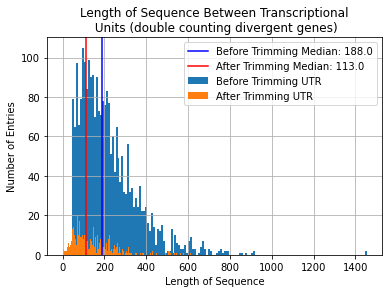

In [40]:
fig, ax = plt.subplots(1)
bins = 150
df_intergenic_analysis[['Intergenic Sequence Length']].hist(bins=bins, ax=ax, label = "Before Trimming UTR")
df_reordered_analysis[['Intergenic Sequence Length']].hist(bins=bins, ax=ax, label = "After Trimming UTR")

median_before = df_intergenic_analysis[['Intergenic Sequence Length']].median()[0]
plt.axvline(x=median_before, 
            color = "blue", 
            label = "Before Trimming Median: " + str(median_before))

median_after = df_reordered_analysis[['Intergenic Sequence Length']].median()[0]
plt.axvline(x=median_after, 
            color = "red", 
            label = "After Trimming Median: " + str(median_after))


plt.xlabel("Length of Sequence")
plt.ylabel("Number of Entries")
plt.title("Length of Sequence Between Transcriptional\n Units (double counting divergent genes)")
# plt.title("Length of Sequence Upstream of Each Transcriptional Unit")
 
plt.legend(loc='best')
plt.savefig("export/sequence_length_histogram_double_count2")

# sequence between transcriptional units (double counting divergent)

Want to make new dataframes that don't double count divergent genes

In [41]:
def undouble_div(df):
    '''
    Removes double countings of a divergent gene so
    we aren't double counting when doing analysis
    '''
    seen = set()
    new_lst = []
    lst_dict = df.to_dict('records')
    for row in lst_dict:    
        adj_gene = row['Adjacent Gene']
        if row['Orientation'] == 'Divergent':
            seen.add(row['Gene'])
        if adj_gene not in seen:
            new_lst.append(row)
    return pd.DataFrame(new_lst)   

df_intergenic_analysis = undouble_div(df_intergenic_analysis)
df_reordered_analysis = undouble_div(df_reordered_analysis)

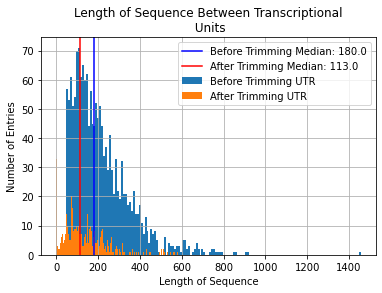

In [42]:
fig, ax = plt.subplots(1)
bins = 150
df_intergenic_analysis[['Intergenic Sequence Length']].hist(bins=bins, ax=ax, label = "Before Trimming UTR")
df_reordered_analysis[['Intergenic Sequence Length']].hist(bins=bins, ax=ax, label = "After Trimming UTR")


median_before = df_intergenic_analysis[['Intergenic Sequence Length']].median()[0]
plt.axvline(x=median_before, 
            color = "blue", 
            label = "Before Trimming Median: " + str(median_before))

median_after = df_reordered_analysis[['Intergenic Sequence Length']].median()[0]
plt.axvline(x=median_after, 
            color = "red", 
            label = "After Trimming Median: " + str(median_after))


plt.xlabel("Length of Sequence")
plt.ylabel("Number of Entries")
plt.title("Length of Sequence Between Transcriptional\n Units")
# plt.title("Length of Sequence Upstream of Each Transcriptional Unit")
 
plt.legend(loc='best')
plt.savefig("export/sequence_length_histogram2")

# sequence between transcriptional units 